# What Does this code do?
1) Import index returns
2) Convert date strings to datetime, and only keep dates greater than Jan 1 1975.
3) Calculate "trend" components (assuming quarterly seasonality), add these features to the dataframe.
4) Take 1st and 2nd derivatives of trend components to get velocity and acceleration features.
5) Only include quarterly data (last day of each month)
5) Export cleaned data to csv to use in master dataframes later.

In [1]:
# Most if not all imports
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.tsa.api as tsa # Use this for exponential smoothing.
from datetime import datetime

In [2]:
# Start with sp500 data. This data is sorted in chronological order.
sp500_raw = pd.read_csv(r"C:\Users\Edmund\OMSA\MGT6203\group project\Team36_group_project\Data\spx RETURN.csv")
display(sp500_raw.head())
print(type(sp500_raw['DATE'].iloc[4]))
# get index where 'DATE' == '1/1/1975'
sp500_min_idx = (sp500_raw.index[sp500_raw['DATE'] == '1/2/75'].to_list())[0]
print(sp500_min_idx)
sp500_cut = sp500_raw[sp500_min_idx:] # only include data from 1975 onward
display(sp500_cut.head(12))
display(sp500_cut.tail(12))

,DATE,PRICE,RETURN
0,#NAME?,17.66,#REF!
1,1/3/28,17.76,0.005662514
2,1/4/28,17.72,-0.002252252
3,1/5/28,17.55,-0.009593679
4,1/6/28,17.66,0.006267806


<class 'str'>
11759


,DATE,PRICE,RETURN
11759,1/2/75,70.23,0.024358226
11760,1/3/75,70.71,0.006834686
11761,1/6/75,71.07,0.005091218
11762,1/7/75,71.02,-0.000703532
11763,1/8/75,70.04,-0.01379893
11764,1/9/75,71.17,0.016133638
11765,1/10/75,72.61,0.020233244
11766,1/13/75,72.31,-0.004131662
11767,1/14/75,71.68,-0.008712488
11768,1/15/75,72.14,0.006417411


,DATE,PRICE,RETURN
24041,9/14/23,4505.10,0.008429884
24042,9/15/23,4450.32,-0.012159553
24043,9/18/23,4453.53,0.000721296
24044,9/19/23,4443.95,-0.002151103
24045,9/20/23,4402.20,-0.009394795
24046,9/21/23,4330.00,-0.01640089
24047,9/22/23,4320.06,-0.002295612
24048,9/25/23,4337.44,0.004023092
24049,9/26/23,4273.53,-0.014734498
24050,9/27/23,4274.51,0.000229319


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


C:\Users\Edmund\AppData\Local\Temp\ipykernel_11652\2018148523.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_cut['DATE'] = pd.to_datetime(sp500_cut['DATE'], format='%m/%d/%y')


,DATE,PRICE,RETURN
11759,1975-01-02,70.23,0.024358226
11760,1975-01-03,70.71,0.006834686
11761,1975-01-06,71.07,0.005091218
11762,1975-01-07,71.02,-0.000703532
11763,1975-01-08,70.04,-0.01379893


,DATE,PRICE,RETURN
24048,2023-09-25,4337.44,0.004023092
24049,2023-09-26,4273.53,-0.014734498
24050,2023-09-27,4274.51,0.000229319
24051,2023-09-28,4299.70,0.005893073
24052,2023-09-29,4288.05,-0.002709491


datetime64[ns]
object


C:\Users\Edmund\AppData\Local\Temp\ipykernel_11652\2018148523.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sp500_cut['RETURN'] = pd.to_numeric(sp500_cut['RETURN'])


<AxesSubplot:xlabel='DATE'>

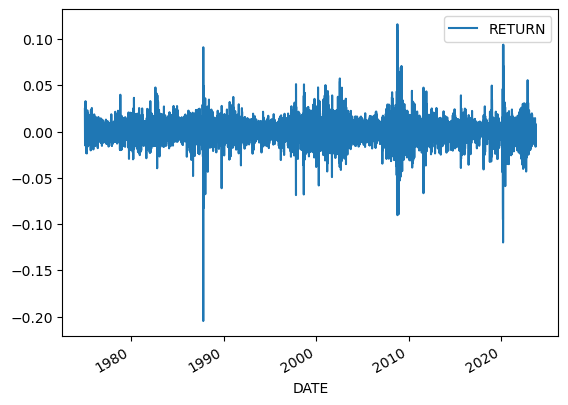

In [3]:
# now let's convert the 'DATE' column to datetime
sp500_cut['DATE'] = pd.to_datetime(sp500_cut['DATE'], format='%m/%d/%y')
print(type(sp500_cut['DATE'].iloc[4]))
display(sp500_cut.head())
display(sp500_cut.tail())
print(sp500_cut['DATE'].dtype)
print(sp500_cut['RETURN'].dtype)
# try converting return to float, see how that goes.
sp500_cut['RETURN'] = pd.to_numeric(sp500_cut['RETURN'])
sp500_cut.plot(x = 'DATE', y = 'RETURN')

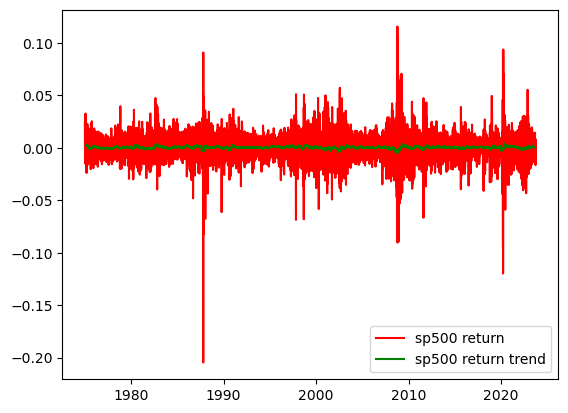

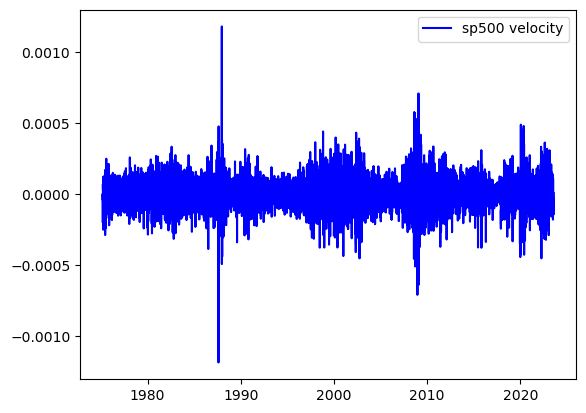

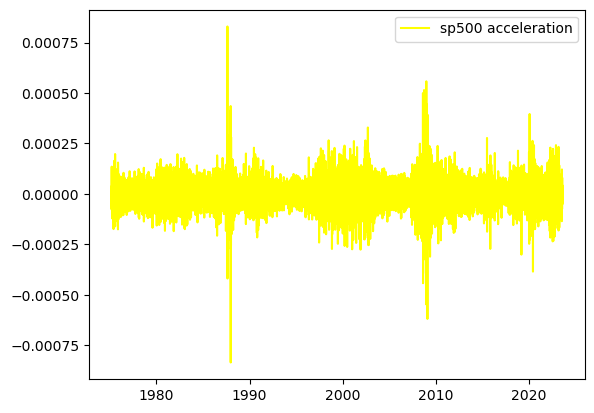

In [4]:
# Ok. now that we have the date ranges and type that we want, it's time to get the trend components and the velocity and acceleration:
# sp500 data is roughly daily so I'll assume 90 day (quarterly) seasonality.
sp500_cut = sp500_cut.rename(columns={'RETURN': 'sp500 return'})
sp500_ts = tsa.seasonal_decompose(sp500_cut['sp500 return'], model='additive', filt=None, period=90, two_sided=True, extrapolate_trend=0)
sp500_cut['sp500 return trend'] = sp500_ts.trend

# plt.plot(sp500_cut['DATE'].iloc[0:400], sp500_cut['sp500 return'].iloc[0:400], color = 'red', label = "sp500 return")
# plt.plot(sp500_cut['DATE'].iloc[0:400], sp500_cut['sp500 return trend'].iloc[0:400], color = 'green', label = "sp500 return trend")
plt.plot(sp500_cut['DATE'], sp500_cut['sp500 return'], color = 'red', label = "sp500 return")
plt.plot(sp500_cut['DATE'], sp500_cut['sp500 return trend'], color = 'green', label = "sp500 return trend")
plt.legend()
plt.show()

# now let's generate velocity and acceleration features based on the exponentially smoothed data:

sp500_cut['sp500 velocity'] = np.gradient(sp500_cut['sp500 return trend'])
sp500_cut['sp500 acceleration'] = np.gradient(sp500_cut['sp500 velocity'])

plt.plot(sp500_cut['DATE'], sp500_cut['sp500 velocity'], color = 'blue', label = 'sp500 velocity')
plt.legend()
plt.show()

plt.plot(sp500_cut['DATE'], sp500_cut['sp500 acceleration'], color = 'yellow', label = 'sp500 acceleration')
plt.legend()
plt.show()

,DATE,PRICE,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,Quarter
11819,1975-03-31,83.36,-0.005844,0.002887,-0.000048,-0.000121,1975Q1
11883,1975-06-30,95.19,0.004008,-0.000033,-0.000026,0.000037,1975Q2
11947,1975-09-30,83.87,-0.013642,-0.000021,-0.000064,0.000021,1975Q3
12011,1975-12-31,90.19,0.004679,0.001120,0.000036,0.000031,1975Q4
12074,1976-03-31,102.77,0.007450,0.000056,-0.000035,0.000008,1976Q1


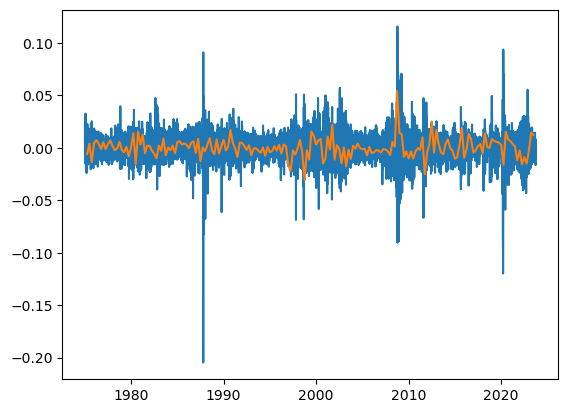

hellow


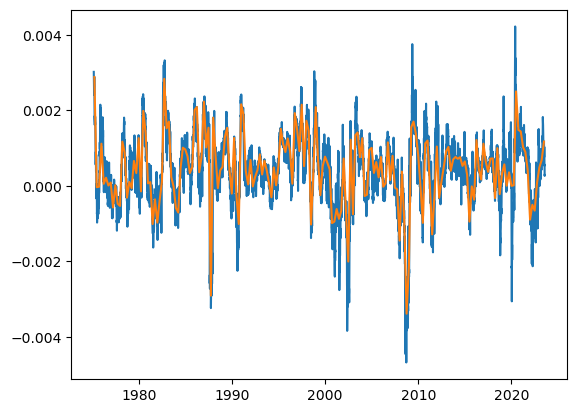

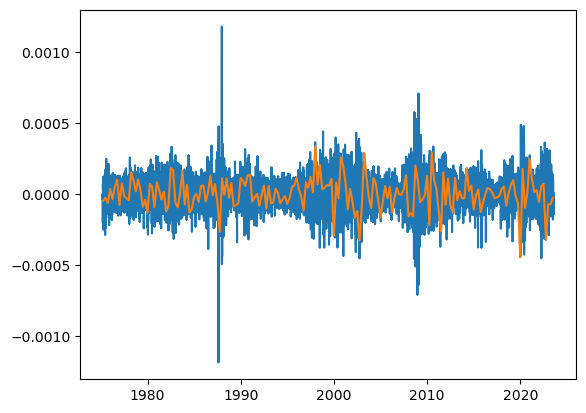

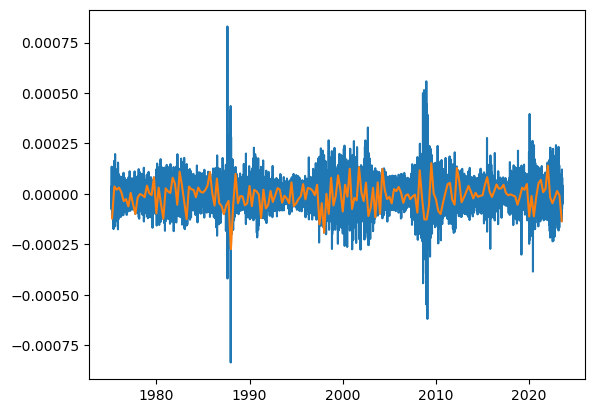

In [5]:
# # Now we need to see what is included/excluded when we only look at the quarterly numbers.
# # get the period for each, make it a column.
sp500_cut["Quarter"] = pd.PeriodIndex(sp500_cut["DATE"], freq="Q")
# This groupby statement worked like a charm:
# https://stackoverflow.com/questions/53842287/select-rows-with-highest-value-from-groupby  
sp500_Q = sp500_cut.loc[sp500_cut.groupby('Quarter')['DATE'].idxmax()]
sp500_Q = sp500_Q.dropna()
display(sp500_Q.head())

# now lets plot the points with the original and trend data to see what it looks like:
# sp500_Q.plot(x="DATE", y=["sp500 return", "sp500 return trend"])
plt.plot(sp500_cut['DATE'], sp500_cut['sp500 return'])
plt.plot(sp500_Q['DATE'], sp500_Q['sp500 return'])
plt.show()

print('hellow')

plt.plot(sp500_cut['DATE'], sp500_cut['sp500 return trend'])
plt.plot(sp500_Q['DATE'], sp500_Q['sp500 return trend'])
# plt.xlim(sp500_Q['DATE'].iloc[0], sp500_Q['DATE'].iloc[300])
plt.show()

plt.plot(sp500_cut['DATE'], sp500_cut['sp500 velocity'])
plt.plot(sp500_Q['DATE'], sp500_Q['sp500 velocity'])
plt.show()

plt.plot(sp500_cut['DATE'], sp500_cut['sp500 acceleration'])
plt.plot(sp500_Q['DATE'], sp500_Q['sp500 acceleration'])
plt.show()

# try groupby period, then date, then take max and see what comes out of it.
#per = pd.period_range(start=sp500_cut['DATE'].iloc[0], end=sp500_cut['DATE'].iloc[-1], freq='Q')
# for each period get max date
#display(per)

In [6]:
# We seem to be losing information by going quarterly. Monthly might be better, but let's give it a try. 
# From here I'm going to remove the 'PRICE' column, then export to csv:
display(sp500_Q.head())
print(list(sp500_Q.columns))
sp500_out = sp500_Q.drop(['PRICE '], axis=1) # drop the price column because we will just be looking at returns
display(sp500_out.head())

# Export to csv then merge with other dataframes that the team comes up with.
now = datetime.now()
date_str = str(now.year) + str(now.month) + str(now.day) + str(now.hour) + str(now.minute) + str(now.second)
#print(date_str)
output_dir = r"C:\\Users\\Edmund\\OMSA\\MGT6203\\group project\Team36_group_project\Data\\"
output_fname = output_dir + "clean_index_data"  + date_str + '.csv'
sp500_out.to_csv(output_fname, index=False)

,DATE,PRICE,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,Quarter
11819,1975-03-31,83.36,-0.005844,0.002887,-0.000048,-0.000121,1975Q1
11883,1975-06-30,95.19,0.004008,-0.000033,-0.000026,0.000037,1975Q2
11947,1975-09-30,83.87,-0.013642,-0.000021,-0.000064,0.000021,1975Q3
12011,1975-12-31,90.19,0.004679,0.001120,0.000036,0.000031,1975Q4
12074,1976-03-31,102.77,0.007450,0.000056,-0.000035,0.000008,1976Q1


['DATE', 'PRICE ', 'sp500 return', 'sp500 return trend', 'sp500 velocity', 'sp500 acceleration', 'Quarter']


,DATE,sp500 return,sp500 return trend,sp500 velocity,sp500 acceleration,Quarter
11819,1975-03-31,-0.005844,0.002887,-0.000048,-0.000121,1975Q1
11883,1975-06-30,0.004008,-0.000033,-0.000026,0.000037,1975Q2
11947,1975-09-30,-0.013642,-0.000021,-0.000064,0.000021,1975Q3
12011,1975-12-31,0.004679,0.001120,0.000036,0.000031,1975Q4
12074,1976-03-31,0.007450,0.000056,-0.000035,0.000008,1976Q1
